## Project Title: EDA on Retail Sales Data

In [1]:

# 1 Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2️ Load Dataset
df = pd.read_csv("retail_sales_dataset.csv")

# peek at the data
print(df.head())
print(df.info())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

# Data Cleaning & Preparation

In [2]:
# ----------------------------------------------------------
# 3️ Data Cleaning & Preparation
# ----------------------------------------------------------

# Rename columns for consistency
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Remove rows without date
df = df.dropna(subset=["date"])

# Ensure numeric columns
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["price_per_unit"] = pd.to_numeric(df["price_per_unit"], errors="coerce")
df["total_amount"] = pd.to_numeric(df["total_amount"], errors="coerce")

# Drop missing quantity/price
df = df.dropna(subset=["quantity", "price_per_unit"])

# Remove duplicates
df = df.drop_duplicates()

# Create additional columns
df["month"] = df["date"].dt.to_period("M")
df["year"] = df["date"].dt.year
df["month_name"] = df["date"].dt.month_name()


print("\nCleaned data preview:\n", df.head())



Cleaned data preview:
    transaction_id       date customer_id  gender  age product_category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   quantity  price_per_unit  total_amount    month  year month_name  
0         3              50           150  2023-11  2023   November  
1         2             500          1000  2023-02  2023   February  
2         1              30            30  2023-01  2023    January  
3         1             500           500  2023-05  2023        May  
4         2              50           100  2023-05  2023        May  


In [3]:
# ----------------------------------------------------------
#  4️ Descriptive Statistics
# ----------------------------------------------------------
print("\n Descriptive Statistics")
print(df[["quantity","price_per_unit","total_amount","age"]].describe())

# Gender Distribution
print("\nGender Distribution:")
print(df["gender"].value_counts())


 Descriptive Statistics
          quantity  price_per_unit  total_amount         age
count  1000.000000     1000.000000   1000.000000  1000.00000
mean      2.514000      179.890000    456.000000    41.39200
std       1.132734      189.681356    559.997632    13.68143
min       1.000000       25.000000     25.000000    18.00000
25%       1.000000       30.000000     60.000000    29.00000
50%       3.000000       50.000000    135.000000    42.00000
75%       4.000000      300.000000    900.000000    53.00000
max       4.000000      500.000000   2000.000000    64.00000

Gender Distribution:
gender
Female    510
Male      490
Name: count, dtype: int64


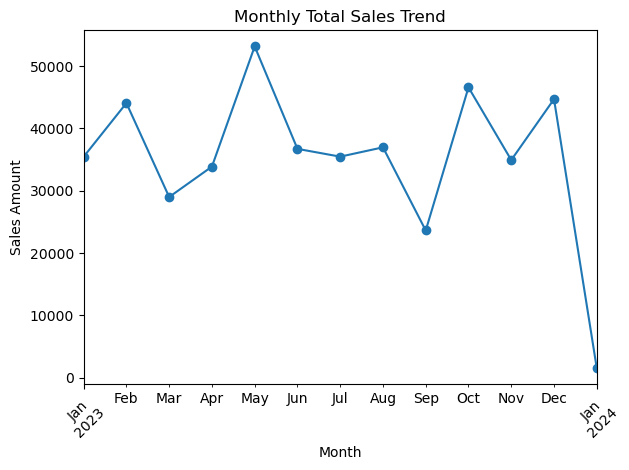

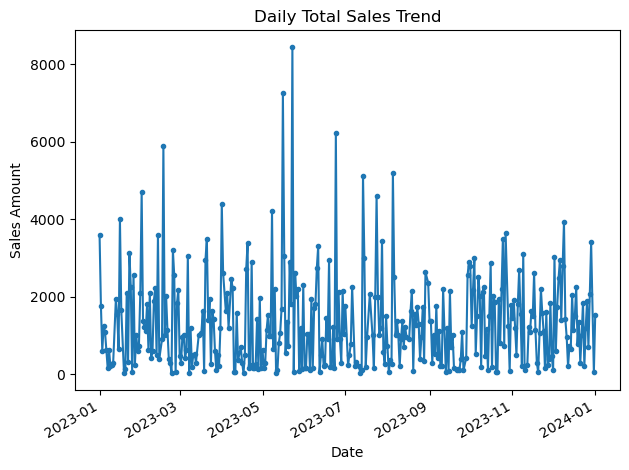

In [4]:
# ----------------------------------------------------------
#  5️ Time-Series Sales Trends
# ----------------------------------------------------------
monthly_sales = df.groupby("month")["total_amount"].sum()

plt.figure()
monthly_sales.plot(marker="o")
plt.title("Monthly Total Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Daily Sales Trend
daily_sales = df.groupby("date")["total_amount"].sum()

plt.figure()
daily_sales.plot(marker=".")
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.tight_layout()
plt.show()

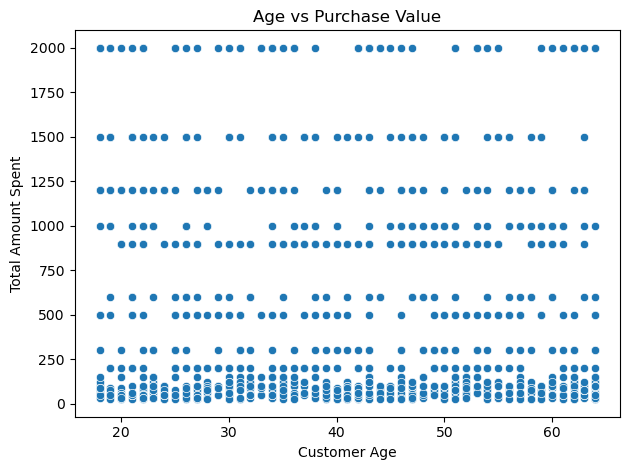

In [5]:
# ----------------------------------------------------------
#  6️ Customer Analysis
# ----------------------------------------------------------


# Age vs Total Spending
plt.figure()
sns.scatterplot(x=df["age"], y=df["total_amount"])
plt.title("Age vs Purchase Value")
plt.xlabel("Customer Age")
plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()


In [6]:
# ----------------------------------------------------------
# 8️ Insights & Recommendations
# ----------------------------------------------------------


# Best month
best_month = monthly_sales.idxmax()
worst_month = monthly_sales.idxmin()

print(f"• Highest sales occurred in **{best_month}** → increase inventory & marketing before this month.")
print(f"• Lowest sales occurred in **{worst_month}** → offer discounts or campaigns.")

# Best performing category
category_sales = df.groupby("product_category")["total_amount"].sum()
top_category = category_sales.idxmax()
print(f"• Top performing category: **{top_category}** → prioritize promotions and stock.")

# Age based insights
popular_age = df.groupby("age")["total_amount"].sum().idxmax()
print(f"• Customers aged around **{popular_age}** spend the most → target ads to this age group.")

print("• Identify returning high-spend customers and push loyalty programs.")
print("• Use month-wise trends to plan seasonal marketing.")
print("• Optimize low performing categories during weak sales months.")


• Highest sales occurred in **2023-05** → increase inventory & marketing before this month.
• Lowest sales occurred in **2024-01** → offer discounts or campaigns.
• Top performing category: **Electronics** → prioritize promotions and stock.
• Customers aged around **43** spend the most → target ads to this age group.
• Identify returning high-spend customers and push loyalty programs.
• Use month-wise trends to plan seasonal marketing.
• Optimize low performing categories during weak sales months.
